In [8]:
from python_scripts.connector import *
from python_scripts.helper import *

In [9]:
from eval_scripts.evalscript_true_color import *
from eval_scripts.evalscript_clm import *

In [10]:
from sentinelhub import MimeType, CRS, BBox, DataCollection

In [11]:
coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

map_bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)
resolution = get_resolution(map_bbox)
map_size = bbox_to_dimensions(map_bbox, resolution=resolution)

print(f'Image shape at {resolution} m resolution: {map_size} pixels')

Image shape at 25.1304 m resolution: (1507, 2500) pixels


In [12]:
request_true_color = lambda eval_script: send_request(
    eval_script, 
    [SentinelHubRequest.input_data(data_collection=DataCollection.SENTINEL2_L1C, time_interval=('2020-06-12', '2020-06-13'))], 
    [SentinelHubRequest.output_response('default', MimeType.PNG)], 
    map_bbox, map_size, config
)

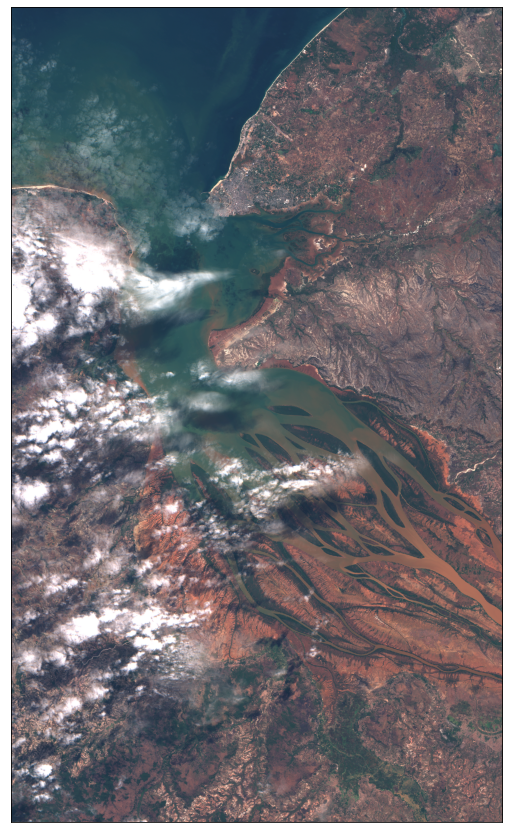

In [13]:
true_color_imgs = request_true_color(evalscript_true_color).get_data()
factor = get_factor(true_color_imgs)
plot_image(true_color_imgs[0], factor=factor, clip_range=(0, 1))

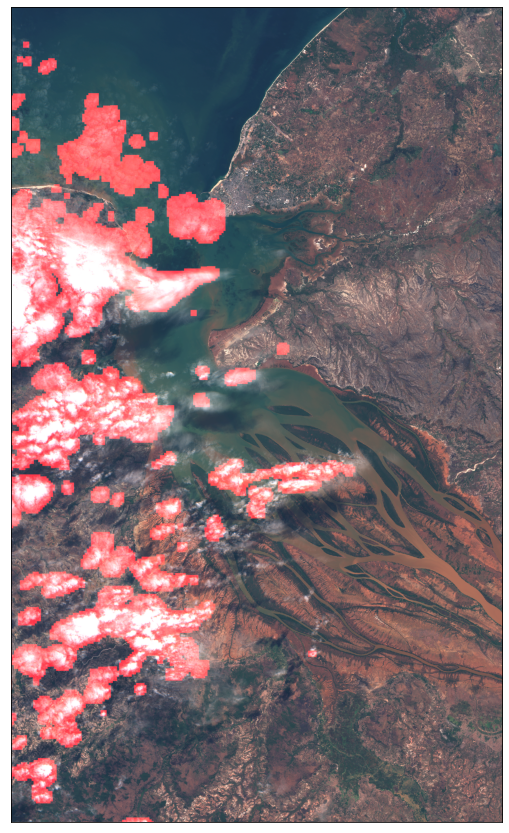

In [14]:
mask_imgs = request_true_color(evalscript_clm).get_data()
factor = get_factor(mask_imgs)
plot_image(mask_imgs[0], factor=factor, clip_range=(0, 1))